Imports necesarios para usar numpy arrays.

In [1]:
import numpy as np

Imports necesarios para extraer datos de un archivo csv.

In [2]:
import pandas as pd

Imports necesarios para la matriz de resultados.

In [3]:
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix

Imports necesarios para dividir entre datos de entrenamiento y test.

In [4]:
from sklearn.model_selection import train_test_split

Imports necesarios para que funcione RandomForest.

In [5]:
from sklearn.ensemble import RandomForestClassifier

Imports necesarios para poder ver los arboles de decision que usa Random Forest

In [6]:
from sklearn import tree

### Ruta donde se encuentra el dataset

In [25]:
filename = 'G:/datos/TFG/TrabajoFinGradoGerman/Dataset/fer2013.csv'

#### NOTA: en este archivo csv se ha omitido la columna 'Usage', posteriormente se usara un 25% del dataset para test

### Definimos las expresiones faciales disponibles

In [8]:
expressions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

### Obtenemos los datos del dataset y almacenamos en variables X e Y

In [17]:
# declaramos las variables contenedoras de los pixeles (X) y de las etiquetas (Y).
X = []
Y = []
# evitamos la primera linea que contiene los nombres de las columnas.
void = True
# comenzamos a leer el archivo csv fila por fila
for line in open(filename):
    if void:
        void = False
    else:
        # dividimos la linea por la coma de forma que tenemos un array con los datos necesarios.
        fila = line.split(',')
        # apilamos los datos en las variables
        Y.append(np.array(fila[0],dtype='uint8'))
        # dividimos la columna "pixels" una vez mas para tener todos los numeros por separado
        fotoSplit = fila[1].split(' ')
        X.append(np.array(fotoSplit,dtype='uint8'))
# convertimos a numpy array para tratar los datos.
# ademas procesamos los pixeles de forma que todos tengan un valor entre 0 y 1 (dividimos entre 255).
X = np.array(X) / 255.0
Y = np.array(Y)

### Dividimos el dataset en entrenamiento y validacion

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

### Entrenamos el modelo con 150 arboles

In [21]:
rf = RandomForestClassifier(n_estimators=150)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Almacenamos las predicciones en una variable y las reales en otra variable

In [22]:
Y_predicted = rf.predict(X_test)
Y_real = Y_test

### Creamos una matriz de confusion para analizar resultados

In [23]:
cm = confusion_matrix(Y_real, Y_predicted,normalize='true')

### Pintamos el porcentaje de acierto y la matriz

Porcentaje de acierto:  0.4675657601426661


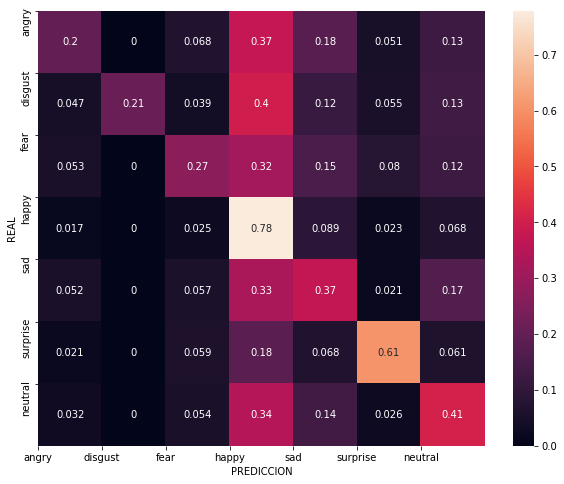

In [24]:
y_pos = np.arange(len(expressions))
plt.figure(figsize=(10,8))
sn.heatmap(cm, annot=True)
plt.xlabel('PREDICCION')
plt.ylabel('REAL')
plt.xticks(y_pos,expressions)
plt.yticks(y_pos,expressions)
print("Porcentaje de acierto: ", rf.score(X_test,Y_test))


#### NOTA: como se puede apreciar las emociones 0, 1 y 2 ('angry','disgust','fear') no tienen buenos resultados.

### Uno de los 150 arboles del dataset

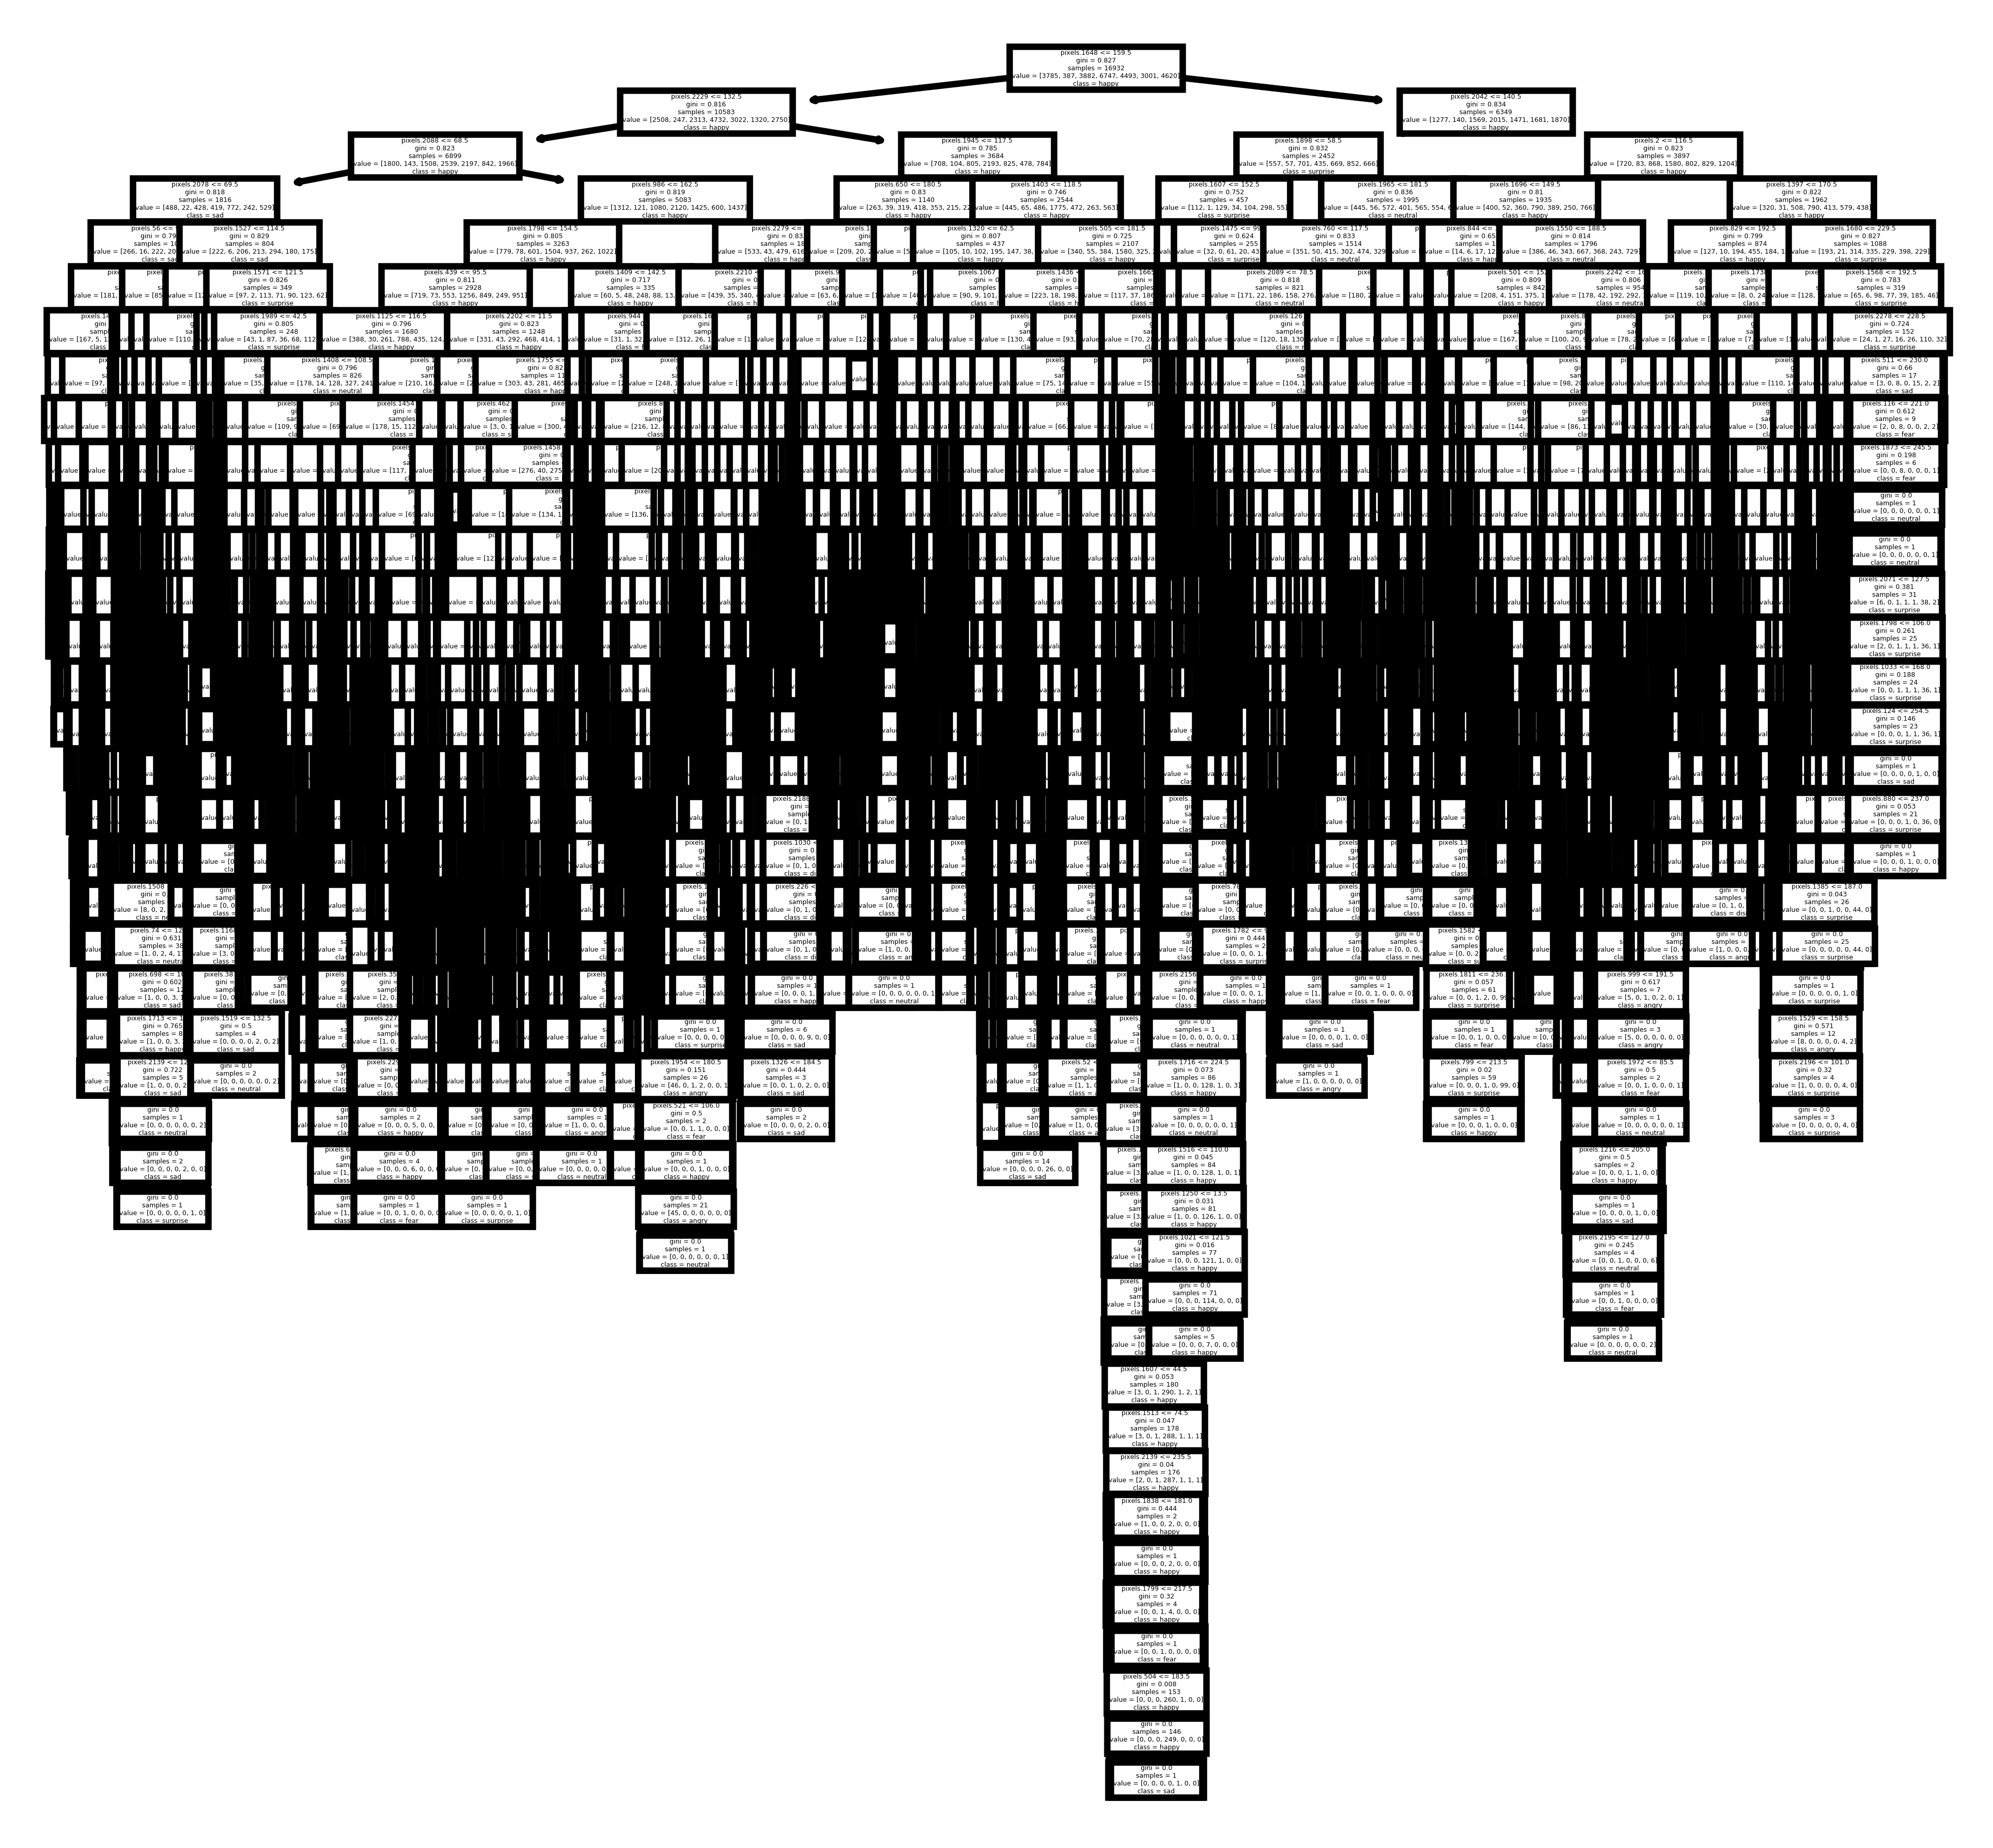

In [19]:
fig, axes = plt.subplots(figsize = (5,5), dpi=900)
tree.plot_tree(rf.estimators_[0],
               feature_names = X_train.columns, 
               class_names= expressions);
fig.savefig('arbol.png')